In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# dati ISTAT
data = pd.read_csv("DCSP_COLTIVAZIONI_22032024191007716.csv")

# Dati remote sensing
toscana = pd.read_csv('Toscana_counts.csv', sep=';')
sicilia = pd.read_csv('Sicilia_counts.csv', sep=';')
puglia = pd.read_csv('Puglia_counts.csv', sep=';')
veneto = pd.read_csv('Veneto_counts.csv', sep=';')

In [43]:
# Rimozione spazi bianchi dopo le stringhe della colonna 'Tipo dato'
data['Tipo dato'] = data['Tipo dato'].str.rstrip()

In [44]:
# Elenco feature 'Tipo dato'
data["Tipo dato"].unique()

array(['produzione totale - quintali', 'produzione raccolta - quintali',
       'superficie totale - are', 'superficie totale - ettari',
       'superficie in produzione - ettari', 'unità foraggere',
       'produzione totale - ettolitri',
       'produzione totale - migliaia di quintali'], dtype=object)

In [45]:
# Elenco feature 'Territorio'
data["Territorio"].unique()

array(['Italia', 'Nord', 'Piemonte', 'Cuneo', 'Asti', 'Liguria',
       'Imperia', 'Genova', 'La Spezia', 'Lombardia', 'Varese', 'Lecco',
       'Milano', 'Bergamo', 'Brescia', 'Cremona', 'Mantova',
       'Trentino Alto Adige / Südtirol', 'Veneto', 'Vicenza', 'Treviso',
       'Venezia', 'Padova', 'Rovigo', 'Friuli-Venezia Giulia', 'Trieste',
       'Emilia-Romagna', 'Piacenza', 'Parma', 'Bologna', 'Ferrara',
       'Forlì-Cesena', 'Centro', 'Toscana', 'Massa-Carrara', 'Firenze',
       'Prato', 'Livorno', 'Arezzo', 'Grosseto', 'Umbria', 'Perugia',
       'Marche', 'Pesaro e Urbino', 'Ancona', 'Macerata', 'Ascoli Piceno',
       'Lazio', 'Roma', 'Latina', 'Frosinone', 'Mezzogiorno', 'Campania',
       'Caserta', 'Napoli', 'Salerno', 'Puglia', 'Brindisi', 'Calabria',
       'Catanzaro', 'Reggio di Calabria', 'Sicilia', 'Agrigento',
       'Catania', 'Sardegna', 'Sassari', 'Nuoro', 'Cagliari', 'Oristano',
       'Olbia-Tempio', 'Ogliastra', 'Medio Campidano',
       'Carbonia-Iglesias',

In [46]:
# Filtro 'Tipo dato' di interesse
data_filtered = data[data["Tipo dato"].isin(['superficie totale - ettari', 'superficie totale - are', 
                                           'superficie in produzione - ettari', 'produzione totale - quintali', 
                                           'produzione totale - migliaia di quintali', 'produzione raccolta - quintali'])]

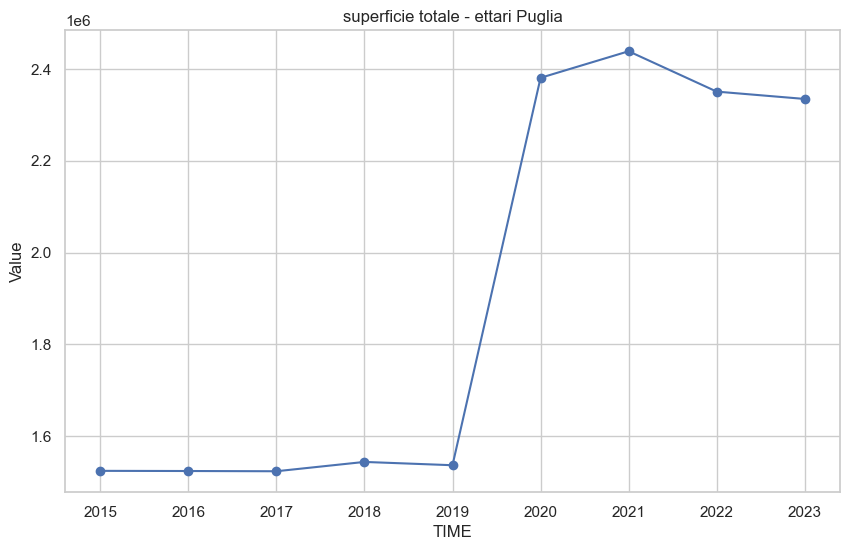

In [47]:
# Selezione del territorio di interesse
territorio = 'Toscana'

# Selezione degli attributi che si vogliono osservare
#attributo = 'produzione totale - quintali'
#attributo = 'produzione raccolta - quintali'
attributo = 'superficie totale - ettari'
#attributo = 'superficie in produzione - ettari'

territorio = 'Puglia'

# Filtrare il territorio di interesse
data_filtered2 = data_filtered[data_filtered['Territorio'] == territorio]

# Selezionare le colonne di interesse
column_of_interest = ['Tipo dato', 'Tipo di coltivazione', 'TIME', 'Value']
data_filtered3 = data_filtered2[column_of_interest]

# Calcolare il valore totale per Tipo dato e TIME
summarized_df = data_filtered3.groupby(['Tipo dato', 'TIME'])['Value'].sum().reset_index()

# Rimuovere l'anno 2024 e tutto quello prima del 2015
summarized_df = summarized_df[(summarized_df['TIME'] != 2024) & (summarized_df['TIME'] >= 2015)]

# Filtrare per 'superficie totale - ettari'
superficie_totale_df = summarized_df[summarized_df['Tipo dato'] == attributo]

title = f'{attributo} {territorio}'
# Creare il grafico
plt.figure(figsize=(10, 6))
plt.plot(superficie_totale_df['TIME'], superficie_totale_df['Value'], marker='o')
plt.title(title)
plt.xlabel('TIME')
plt.ylabel('Value')
plt.grid(True)
plt.show()

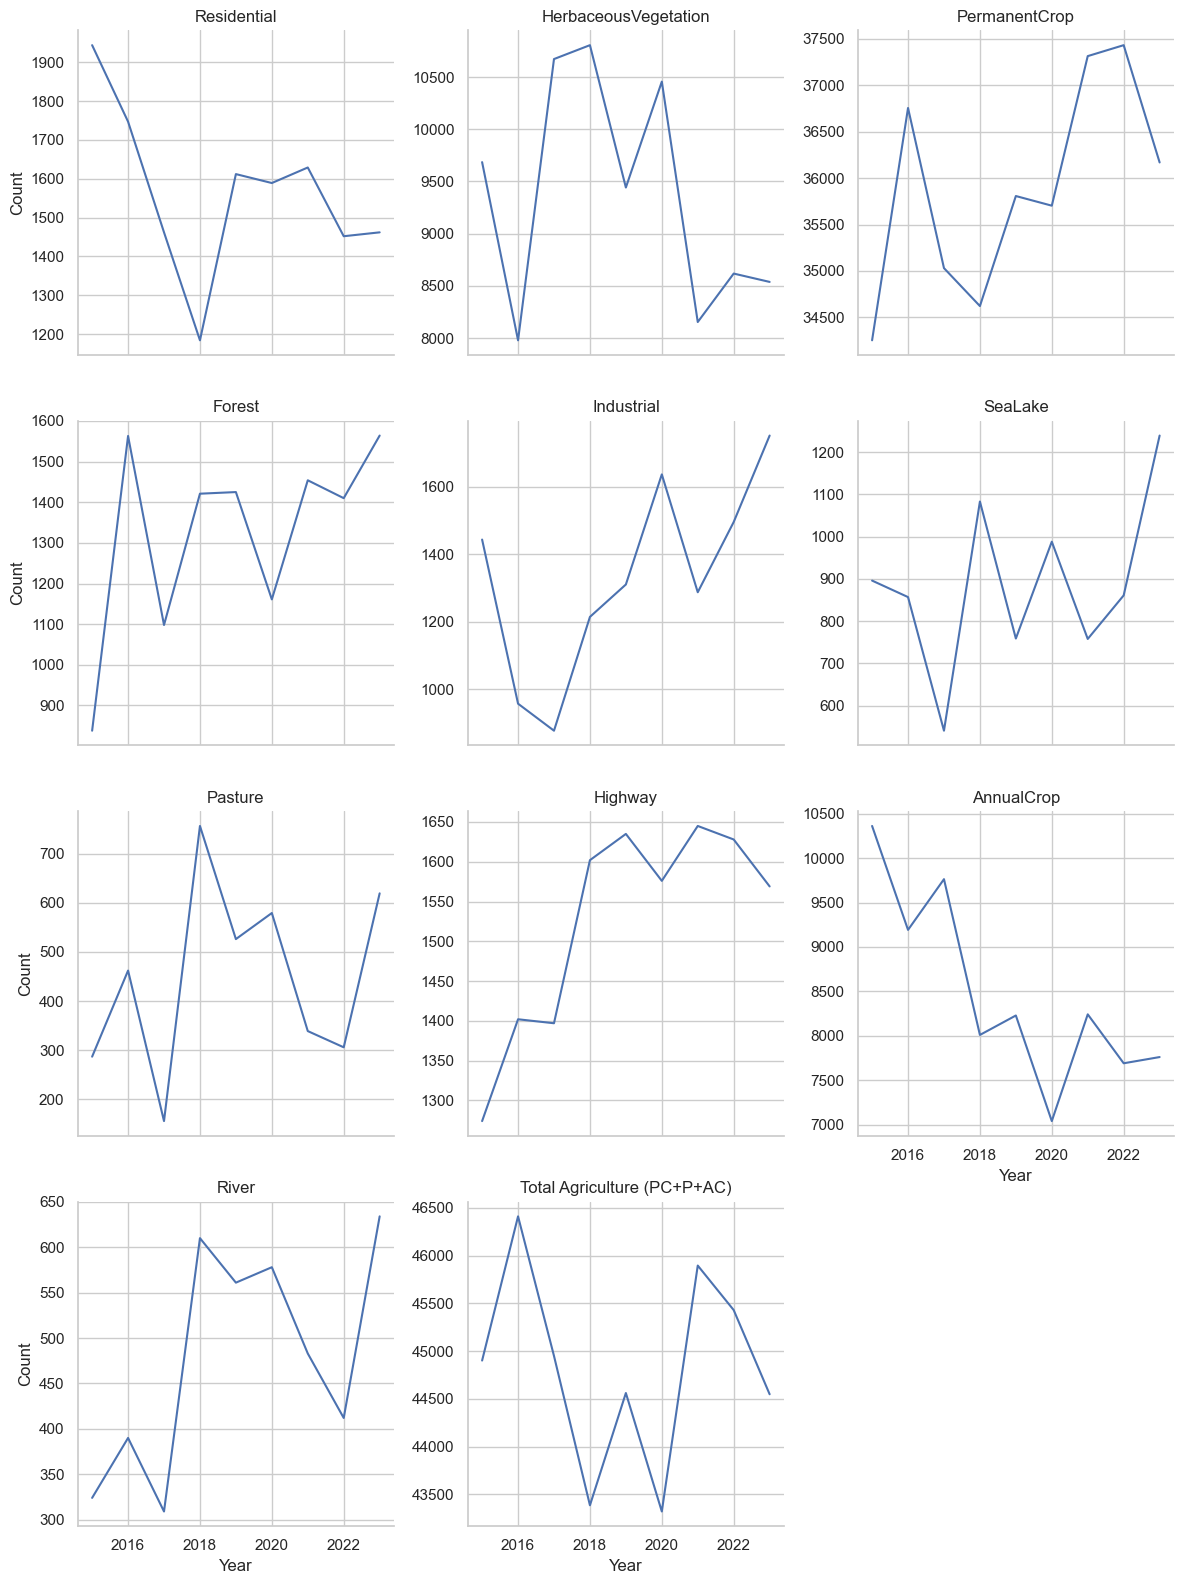

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df_final = puglia

# Step 2: Transform the DataFrame into a long format
df_long = pd.melt(df_final, id_vars=['pred'], var_name='year', value_name='count')

# Step 3: Extract the year from the string and handle NaN values
df_long['year'] = df_long['year'].str.extract('(\d{4})')

# Drop rows where 'year' extraction failed
df_long = df_long.dropna(subset=['year'])

# Convert 'year' to integer type
df_long['year'] = df_long['year'].astype(int)

# Step 4: Set the Seaborn style
sns.set(style="whitegrid")

# Step 5: Create a figure with subplots for each category
g = sns.FacetGrid(df_long, col='pred', col_wrap=3, sharey=False, height=4)
g.map(sns.lineplot, 'year', 'count')

# Add titles and adjust the layout
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Count")
g.fig.tight_layout()

# Show the plots
plt.show()

In [49]:
#Ettari singolo tile 
single_tile_toscana = 29.21
single_tile_puglia = 31.64
single_tile_veneto = 28.14
single_tile_sicilia = 32.32 

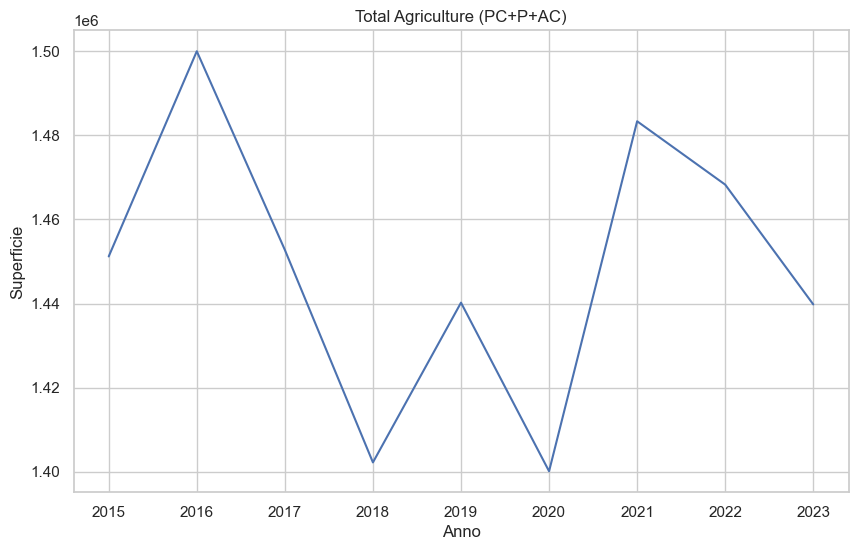

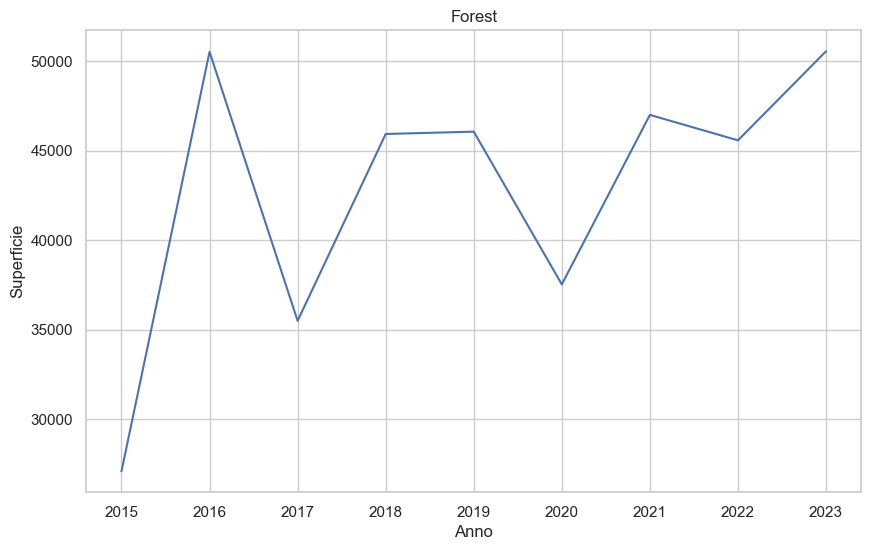

In [51]:
df_agriculture = df_long[df_long['pred'] == 'Total Agriculture (PC+P+AC)']
df_forest = df_long[df_long['pred'] == 'Forest']

# Multiply the 'count' values by the value of the tile
df_agriculture.loc[:, 'count'] = df_agriculture['count'] * 32.32

df_forest.loc[:, 'count'] = df_forest['count'] * 32.32


#Plot the filtered data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_agriculture, x='year', y='count')
plt.title('Total Agriculture (PC+P+AC)')
plt.xlabel('Anno')
plt.ylabel('Superficie')
plt.show()

#Plot the filtered data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_forest, x='year', y='count')
plt.title('Forest')
plt.xlabel('Anno')
plt.ylabel('Superficie')
plt.show()